In [1]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_text as text
import collections
import os
import pathlib
import re
import string
import sys
import tempfile
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_text as text
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import keras
import logging
import warnings
warnings.filterwarnings("ignore")

In [2]:
from transformers import AutoModelForSequenceClassification
from datasets import Dataset, load_dataset
from transformers import AutoTokenizer # T5ForConditionalGeneration # RobertaTokenizer

In [3]:
id2label = {0: "CORRECT", 1: "BUGGY"}
label2id = {"CORRECT": 0, "BUGGY": 1}

In [4]:
from transformers import AutoModelForSequenceClassification
from datasets import Dataset, load_dataset
from transformers import AutoTokenizer # T5ForConditionalGeneration # RobertaTokenizer

In [5]:
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased',
                                                           num_labels=2,
                                                           id2label=id2label,
                                                           label2id=label2id)

tokenizers = AutoTokenizer.from_pretrained('dipudl/codet5-base')

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

Downloading:   0%|          | 0.00/3.59k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/276k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/148k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.01k [00:00<?, ?B/s]

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/kaggle/input/finalized-csv/finalized.csv')
df = df.iloc[:,1:]
df

,labels,full_text
0,0,__builtin_bfin_compose_2x16 0x3000 0x2000 int ...
1,1,__builtin_bfin_compose_2x16 0x2000 0x3000 int ...
2,0,__builtin_bfin_compose_2x16 0x7000 0x5000 int ...
3,1,__builtin_bfin_compose_2x16 0x5000 0x7000 int ...
4,0,foo0000 a b fract2x16 a b
...,...,...
52021,1,strcmp visual opt int __s1 __s2
52022,0,strcmp opt normal int __s1 __s2
52023,1,strcmp normal opt int __s1 __s2
52024,0,strcmp opt off int __s1 __s2


In [8]:
data_sol = df.iloc[52021]['full_text']
print(data_sol)

strcmp visual opt int __s1 __s2


In [9]:
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import en_core_web_sm

In [10]:
nlp = en_core_web_sm.load()

In [11]:
a = "setDimension width height int x y"
b = "swap &first &second char* x y"

In [12]:
# tokens = [token.text for token in nlp(sentence)]
sentence = a
tokens = tokenizers(sentence, truncation=True, max_length=100, padding=True)

In [13]:
my_tok = tokenizers.tokenize(sentence)

In [14]:
my_tok

['set', 'Dim', 'ension', 'Ġwidth', 'Ġheight', 'Ġint', 'Ġx', 'Ġy']

In [15]:
tokens

{'input_ids': [1, 492, 13570, 3722, 2891, 3808, 470, 695, 813, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [16]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_sm")

# Tokenize sentence into individual words
doc = nlp(sentence)
words = [token.text for token in doc]
num_words = len(words)
# Create matrix to store word vectors
word_vectors = np.zeros((num_words, doc.vector.shape[0]))

In [17]:
# Fill matrix with word vectors
for i, token in enumerate(doc):
    word_vectors[i, :] = token.vector

print(word_vectors)

[[ 0.63661975  0.32817087 -0.11302954 -0.22603124  0.92357397 -0.76694965
  -0.20864457 -0.72217387  0.9246136   0.52613044 -0.11685967  0.83841193
   0.57658982  0.13775572 -0.98159057 -0.52779424 -0.79160517 -0.40610981
  -0.6097917   0.64414513 -0.15217274  1.30118668 -0.74867976  0.93459177
   0.14002761  0.42813811 -0.0977334  -0.42627475  0.19674712 -0.80484045
   0.08951573 -0.73242056 -2.1480062  -0.49819785 -0.12553221 -0.24747455
   0.0479672   1.49842167  0.72536576 -0.8608616  -0.6649949  -0.93841511
  -0.13275796 -0.11398497 -0.80119574  0.54991943 -0.66455364 -1.00925493
   0.53834975  1.26114285  1.31714118 -0.06851313  0.16234918 -0.89997584
  -0.08924657 -0.84375226 -0.33746272  0.48216197 -0.04314442 -0.18539882
  -0.60333705 -1.0430398   0.10043839 -0.06655924 -0.74872684  1.0641222
   0.86909556  0.78589666  0.22811913 -1.2230432   1.00875139 -0.47283334
  -0.85215342 -0.64374936  0.10747838  0.60511696 -0.36393774  1.00949943
  -0.62725461 -0.44269928 -0.76528168 -

In [18]:
vectors = [nlp(word).vector for word in my_tok]

In [19]:
vectors

[array([ 0.7548573 , -0.35159153,  0.64733815, -0.68767273, -0.1912132 ,
         0.36595187,  0.5138785 ,  0.00744566, -0.04025263,  0.43027037,
        -1.1313651 , -0.16141267, -1.0600406 , -0.20082086,  0.10455727,
        -0.12082741, -0.04039717, -0.39480153, -1.1819522 ,  0.5216594 ,
        -0.04996032, -0.32466263,  0.06034645,  1.2237722 ,  0.21030559,
         0.87755686,  0.33606043,  1.3284359 ,  0.5815441 , -0.051796  ,
         0.20138356, -0.5621563 ,  0.72569895,  1.9646573 , -0.6378695 ,
        -0.42695138,  1.0691252 , -0.6744262 ,  0.17251465,  0.5968582 ,
        -0.7150949 ,  0.12436093,  0.29176086, -0.29323095, -1.0302141 ,
         0.43891248, -0.355189  , -1.2407949 , -0.3488276 ,  1.0141104 ,
        -1.0449109 , -0.10804117, -0.59621525,  0.88974893,  0.18935889,
         0.23057494, -1.3399875 , -0.6965829 ,  0.4027435 , -0.2600531 ,
         0.18563344, -0.0999002 ,  0.71754736, -0.48910034,  0.1654064 ,
         0.47943127, -0.6283535 ,  0.09653151, -0.0

In [20]:
tensor = torch.tensor([vectors])

In [21]:
tensor.shape

torch.Size([1, 8, 96])

In [22]:
batch_size, sequence_length, embedding_size = tensor.shape

In [23]:
embedding_size

96

In [24]:
self_attention = torch.nn.MultiheadAttention(embed_dim=embedding_size, num_heads=1)

In [25]:
tensor.shape

torch.Size([1, 8, 96])

In [26]:
a = tensor.transpose(0, 1)
a.shape

torch.Size([8, 1, 96])

In [27]:
output, _ = self_attention(tensor.transpose(0, 1), tensor.transpose(0, 1), tensor.transpose(0, 1))

In [28]:
output[0]

tensor([[-0.1799, -0.1726, -0.0355,  0.0980, -0.0546, -0.0762, -0.0822, -0.0797,
         -0.1569,  0.1209, -0.2164, -0.1023,  0.0683, -0.0030,  0.0834,  0.1181,
          0.1455,  0.2679, -0.0236,  0.1137, -0.0070, -0.0264, -0.0397, -0.1978,
          0.1467, -0.2215, -0.1148,  0.1493,  0.1963,  0.0326,  0.1761,  0.1003,
         -0.0710,  0.0066,  0.0438, -0.3127,  0.0195,  0.2510,  0.1774,  0.0250,
         -0.0577, -0.2203, -0.2428, -0.1061, -0.4176, -0.0746,  0.0220,  0.3302,
          0.0607, -0.2224,  0.4462, -0.0099, -0.0006, -0.0711, -0.0263,  0.2280,
          0.0048, -0.0675,  0.2002,  0.3390, -0.1768,  0.2020,  0.0947, -0.1297,
          0.1025,  0.2171, -0.1913, -0.0246, -0.0767, -0.0715, -0.0859, -0.0336,
         -0.1090, -0.5619, -0.0479, -0.0894,  0.0854, -0.0063,  0.0048, -0.2703,
          0.0658, -0.2511,  0.3557,  0.0651, -0.0266,  0.3568, -0.0807,  0.1514,
          0.0860,  0.1814,  0.0196,  0.1393,  0.2846, -0.1947,  0.2246,  0.2152]],
       grad_fn=<SelectBack

In [29]:
from scipy.special import softmax

In [30]:
#attention_weights = F.softmax(output, dim=1)
#attention_weights = softmax(output)

In [31]:
#attention_weights[2]

In [32]:
sequence_length

8

In [33]:
weights_array = output.squeeze().detach().numpy()

In [34]:
weights_array

array([[-1.79944962e-01, -1.72649592e-01, -3.54507007e-02,
         9.80178490e-02, -5.45536354e-02, -7.62194246e-02,
        -8.21957365e-02, -7.97110796e-02, -1.56880811e-01,
         1.20889142e-01, -2.16383800e-01, -1.02258638e-01,
         6.83175921e-02, -2.96244142e-03,  8.33646879e-02,
         1.18080184e-01,  1.45539850e-01,  2.67931908e-01,
        -2.36133542e-02,  1.13678254e-01, -6.96148537e-03,
        -2.63718348e-02, -3.97040099e-02, -1.97833687e-01,
         1.46675259e-01, -2.21517146e-01, -1.14775181e-01,
         1.49318308e-01,  1.96327180e-01,  3.26153897e-02,
         1.76102281e-01,  1.00291103e-01, -7.09524602e-02,
         6.56087883e-03,  4.38083112e-02, -3.12705487e-01,
         1.95254497e-02,  2.51025498e-01,  1.77359104e-01,
         2.50295065e-02, -5.77444434e-02, -2.20290661e-01,
        -2.42800876e-01, -1.06069371e-01, -4.17613536e-01,
        -7.45832026e-02,  2.20065527e-02,  3.30200702e-01,
         6.07230291e-02, -2.22389311e-01,  4.46191072e-0

In [35]:
weights_array.shape

(8, 96)

In [36]:
sequence_length

8

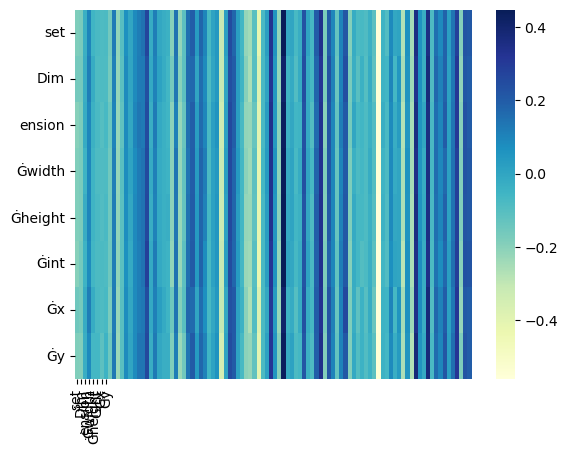

In [37]:
sns.heatmap(weights_array, cmap="YlGnBu", annot=False,xticklabels=my_tok, yticklabels=my_tok)
plt.show()

In [38]:
import numpy as np

In [39]:
q_weights, k_weights, v_weights = np.split(weights_array, 3, axis=-1)

In [40]:
n_heads=1

In [41]:
q_weights = np.reshape(q_weights, (q_weights.shape[0], q_weights.shape[1], n_heads, -1))
k_weights = np.reshape(k_weights, (k_weights.shape[0], k_weights.shape[1], n_heads, -1))
v_weights = np.reshape(v_weights, (v_weights.shape[0], v_weights.shape[1], n_heads, -1))

In [42]:
q_weights.shape

(8, 32, 1, 1)

In [43]:
q_weights

array([[[[-1.79944962e-01]],

        [[-1.72649592e-01]],

        [[-3.54507007e-02]],

        [[ 9.80178490e-02]],

        [[-5.45536354e-02]],

        [[-7.62194246e-02]],

        [[-8.21957365e-02]],

        [[-7.97110796e-02]],

        [[-1.56880811e-01]],

        [[ 1.20889142e-01]],

        [[-2.16383800e-01]],

        [[-1.02258638e-01]],

        [[ 6.83175921e-02]],

        [[-2.96244142e-03]],

        [[ 8.33646879e-02]],

        [[ 1.18080184e-01]],

        [[ 1.45539850e-01]],

        [[ 2.67931908e-01]],

        [[-2.36133542e-02]],

        [[ 1.13678254e-01]],

        [[-6.96148537e-03]],

        [[-2.63718348e-02]],

        [[-3.97040099e-02]],

        [[-1.97833687e-01]],

        [[ 1.46675259e-01]],

        [[-2.21517146e-01]],

        [[-1.14775181e-01]],

        [[ 1.49318308e-01]],

        [[ 1.96327180e-01]],

        [[ 3.26153897e-02]],

        [[ 1.76102281e-01]],

        [[ 1.00291103e-01]]],


       [[[-1.63332269e-01]],

        

In [44]:
k_weights.shape

(8, 32, 1, 1)

In [45]:
k_weights

array([[[[-0.07095246]],

        [[ 0.00656088]],

        [[ 0.04380831]],

        [[-0.3127055 ]],

        [[ 0.01952545]],

        [[ 0.2510255 ]],

        [[ 0.1773591 ]],

        [[ 0.02502951]],

        [[-0.05774444]],

        [[-0.22029066]],

        [[-0.24280088]],

        [[-0.10606937]],

        [[-0.41761354]],

        [[-0.0745832 ]],

        [[ 0.02200655]],

        [[ 0.3302007 ]],

        [[ 0.06072303]],

        [[-0.22238931]],

        [[ 0.44619107]],

        [[-0.00992558]],

        [[-0.00057879]],

        [[-0.0710562 ]],

        [[-0.02631452]],

        [[ 0.22802983]],

        [[ 0.0047607 ]],

        [[-0.06750906]],

        [[ 0.20022345]],

        [[ 0.3390321 ]],

        [[-0.176796  ]],

        [[ 0.20203836]],

        [[ 0.09474248]],

        [[-0.12971738]]],


       [[[-0.08265193]],

        [[ 0.00048222]],

        [[ 0.04561205]],

        [[-0.30589813]],

        [[ 0.00518293]],

        [[ 0.24023029]],

        [[

In [46]:
v_weights.shape

(8, 32, 1, 1)

In [47]:
v_weights

array([[[[ 0.1024723 ]],

        [[ 0.21706542]],

        [[-0.1912574 ]],

        [[-0.02461402]],

        [[-0.07672554]],

        [[-0.07149889]],

        [[-0.08587623]],

        [[-0.03355473]],

        [[-0.10899501]],

        [[-0.56193507]],

        [[-0.04790799]],

        [[-0.08937673]],

        [[ 0.08537531]],

        [[-0.00628825]],

        [[ 0.00477709]],

        [[-0.27025717]],

        [[ 0.06577339]],

        [[-0.2510959 ]],

        [[ 0.35571545]],

        [[ 0.06513613]],

        [[-0.02658995]],

        [[ 0.35682452]],

        [[-0.08070218]],

        [[ 0.1513647 ]],

        [[ 0.08596506]],

        [[ 0.18144166]],

        [[ 0.01961753]],

        [[ 0.13932149]],

        [[ 0.28455317]],

        [[-0.1946963 ]],

        [[ 0.22458129]],

        [[ 0.21522523]]],


       [[[ 0.10292768]],

        [[ 0.2405271 ]],

        [[-0.17468797]],

        [[-0.0330692 ]],

        [[-0.10687058]],

        [[-0.04001829]],

        [[

In [48]:
from scipy.special import softmax

In [49]:
# Calculate the dot product of the queries and keys for each head
qk_dot = np.einsum('ijkl,ijml->ijkm', q_weights, k_weights)

# Scale the dot products by the square root of the key dimension
scaled_qk = qk_dot / np.sqrt(k_weights.shape[-1])

# Apply the softmax function to the scaled dot products
attention_weights = softmax(scaled_qk, axis=-1)

# Calculate the weighted sum of the values for each head
v_weighted = np.einsum('ijkl,ijkm->ijlm', v_weights, attention_weights)

# Reshape the weighted values for concatenation across heads
v_weighted = np.reshape(v_weighted, (v_weighted.shape[0], v_weighted.shape[1], -1))

In [50]:
# Concatenate the weighted values across heads
self_attention = np.concatenate(np.split(v_weighted, n_heads, axis=-1), axis=-2)

In [51]:
self_attention.shape

(8, 32, 1)

In [52]:
x,y,z = self_attention.shape

In [53]:
self_attention = self_attention.reshape(x,y)

In [54]:
self_attention.shape

(8, 32)

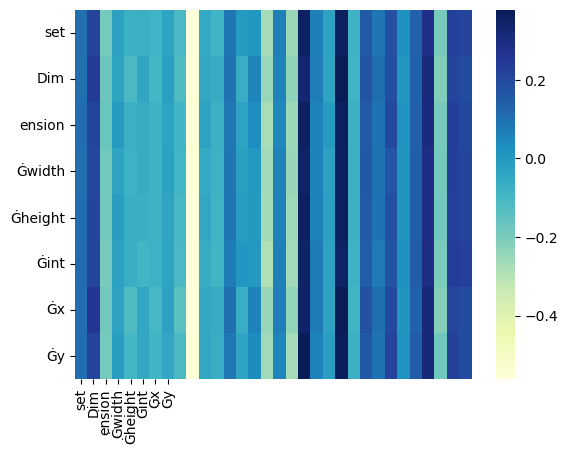

In [55]:
sns.heatmap(self_attention, cmap="YlGnBu", annot=False,xticklabels=my_tok, yticklabels=my_tok)
plt.show()

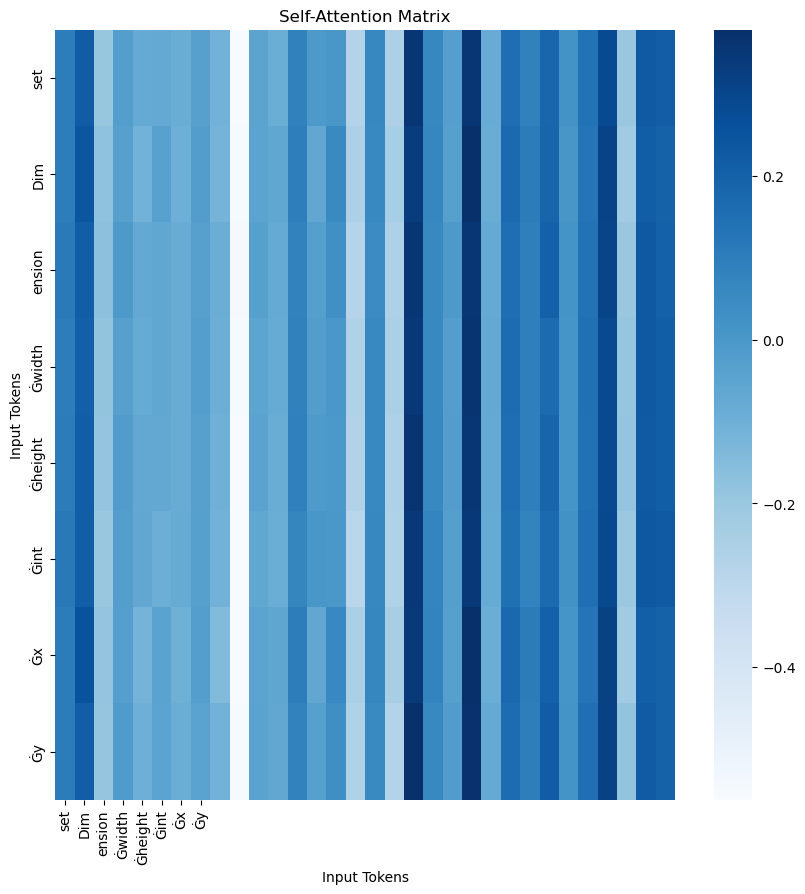

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(self_attention, cmap="Blues", annot=False, ax=ax,xticklabels=my_tok, yticklabels=my_tok)

# Add labels and title
ax.set_xlabel("Input Tokens")
ax.set_ylabel("Input Tokens")
ax.set_title("Self-Attention Matrix")

# Show the plot
plt.show()

In [57]:
q_weights.shape

(8, 32, 1, 1)

In [58]:
q_weights = q_weights.reshape(x,y)

In [59]:
k_weights = k_weights.reshape(x,y)

In [60]:
v_weights = v_weights.reshape(x,y)

In [61]:
q_weights.shape

(8, 32)

In [62]:
k_weights.shape

(8, 32)

In [63]:
v_weights.shape

(8, 32)

In [64]:
import torch.nn as nn

In [65]:
# Define the attention layer
class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        
        # check if embedding size is divisible by number of heads
        assert (self.head_dim * heads == embed_size), "Embedding size must be divisible by number of heads"
        
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads*self.head_dim, embed_size)
        
    def forward(self, values, keys, query):
        # Get number of training examples
        N = query.shape[0]
        
        # Split the embedding into self.heads pieces
        values = values.reshape(N, -1, self.heads, self.head_dim)
        keys = keys.reshape(N, -1, self.heads, self.head_dim)
        query = query.reshape(N, -1, self.heads, self.head_dim)
        
        # Calculate energy for each self.heads
        energy = torch.einsum("nqhd,nkhd->nhqk", [query, keys])
        # energy shape : (N, heads, query_len, key_len)
        
        # Apply attention on energy
        attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3)
        
        # Get the weighted average of values
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(N, -1, self.heads*self.head_dim)
        
        # Concatenate heads
        out = self.fc_out(out)
        
        return out, attention

In [66]:
# Create an instance of the SelfAttention layer
self_attn = SelfAttention(embed_size=4, heads=2)

# Define a small example with 2 words and an embedding dimension of 4
# values = torch.rand(1, 2, 4) # (batch_size=1, sequence_length=2, embedding_size=4)
# keys = torch.rand(1, 2, 4) # (batch_size=1, sequence_length=2, embedding_size=4)
# query = torch.rand(1, 2, 4) # (batch_size=1, sequence_length=2, embedding_size=4)
values = torch.from_numpy(v_weights)
keys = torch.from_numpy(k_weights)
query = torch.from_numpy(q_weights)

# Pass the example through the SelfAttention layer
output, attentions = self_attn(values, keys, query)

In [67]:
# Print the output and attention tensor
print(output)

tensor([[[-3.4872e-02, -4.4272e-01, -1.7495e-03,  3.0673e-01],
         [-3.4983e-02, -4.4285e-01, -1.8440e-03,  3.0693e-01],
         [-3.5095e-02, -4.4325e-01, -1.9685e-03,  3.0797e-01],
         [-3.4913e-02, -4.4303e-01, -2.4123e-03,  3.0604e-01],
         [-3.5194e-02, -4.4356e-01, -2.8545e-03,  3.0684e-01],
         [-3.4858e-02, -4.4288e-01, -1.9240e-03,  3.0670e-01],
         [-3.5493e-02, -4.4265e-01, -1.8725e-03,  3.0675e-01],
         [-3.4853e-02, -4.4307e-01, -2.6706e-03,  3.0545e-01]],

        [[-3.1966e-02, -4.4269e-01, -9.3782e-04,  3.0539e-01],
         [-3.2123e-02, -4.4279e-01, -1.0719e-03,  3.0547e-01],
         [-3.2019e-02, -4.4306e-01, -9.6351e-04,  3.0650e-01],
         [-3.2051e-02, -4.4296e-01, -1.5366e-03,  3.0479e-01],
         [-3.2154e-02, -4.4333e-01, -1.7656e-03,  3.0547e-01],
         [-3.2049e-02, -4.4286e-01, -1.1639e-03,  3.0538e-01],
         [-3.2638e-02, -4.4273e-01, -1.2295e-03,  3.0535e-01],
         [-3.2021e-02, -4.4295e-01, -1.6935e-03,  3.0

In [68]:
print(attentions[0])

tensor([[[0.1245, 0.1210, 0.1269, 0.1294, 0.1255, 0.1246, 0.1245, 0.1236],
         [0.1248, 0.1234, 0.1259, 0.1264, 0.1255, 0.1249, 0.1249, 0.1243],
         [0.1251, 0.1261, 0.1233, 0.1280, 0.1221, 0.1239, 0.1238, 0.1277],
         [0.1250, 0.1254, 0.1251, 0.1236, 0.1256, 0.1253, 0.1254, 0.1245],
         [0.1256, 0.1306, 0.1219, 0.1211, 0.1229, 0.1249, 0.1250, 0.1279],
         [0.1249, 0.1245, 0.1253, 0.1252, 0.1253, 0.1250, 0.1250, 0.1247],
         [0.1246, 0.1221, 0.1279, 0.1226, 0.1291, 0.1263, 0.1263, 0.1210],
         [0.1252, 0.1268, 0.1249, 0.1208, 0.1263, 0.1259, 0.1259, 0.1243]],

        [[0.1229, 0.1247, 0.1248, 0.1269, 0.1239, 0.1264, 0.1266, 0.1239],
         [0.1270, 0.1246, 0.1275, 0.1239, 0.1234, 0.1247, 0.1230, 0.1258],
         [0.1279, 0.1239, 0.1305, 0.1241, 0.1206, 0.1254, 0.1216, 0.1260],
         [0.1221, 0.1253, 0.1222, 0.1267, 0.1264, 0.1257, 0.1278, 0.1237],
         [0.1225, 0.1247, 0.1244, 0.1271, 0.1241, 0.1265, 0.1269, 0.1237],
         [0.1296, 0.125

TypeError: Invalid shape (2, 8, 8) for image data

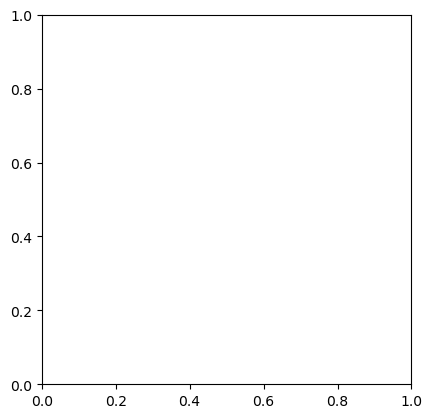

In [69]:
# Plot the attention tensor using Matplotlib
plt.imshow(attentions[0], cmap='hot', interpolation='nearest')
plt.xlabel("Words")
plt.ylabel("Words")
plt.show()

In [70]:
d_k = query.size(-1)
d_k

32

In [71]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [72]:
scores = np.dot(q_weights,k_weights.T)/np.sqrt(d_k)

In [73]:
my_softmax = softmax(scores)

In [74]:
attention_weights = np.dot(my_softmax,v_weights)

In [75]:
attention_weights.shape

(8, 32)

In [76]:
for i, ax in enumerate(axs):
    attn_data = attention_weights[i]
    print(attn_data)

NameError: name 'axs' is not defined

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
(32,)


IndexError: Inconsistent shape between the condition and the input (got (32, 1) and (32,))

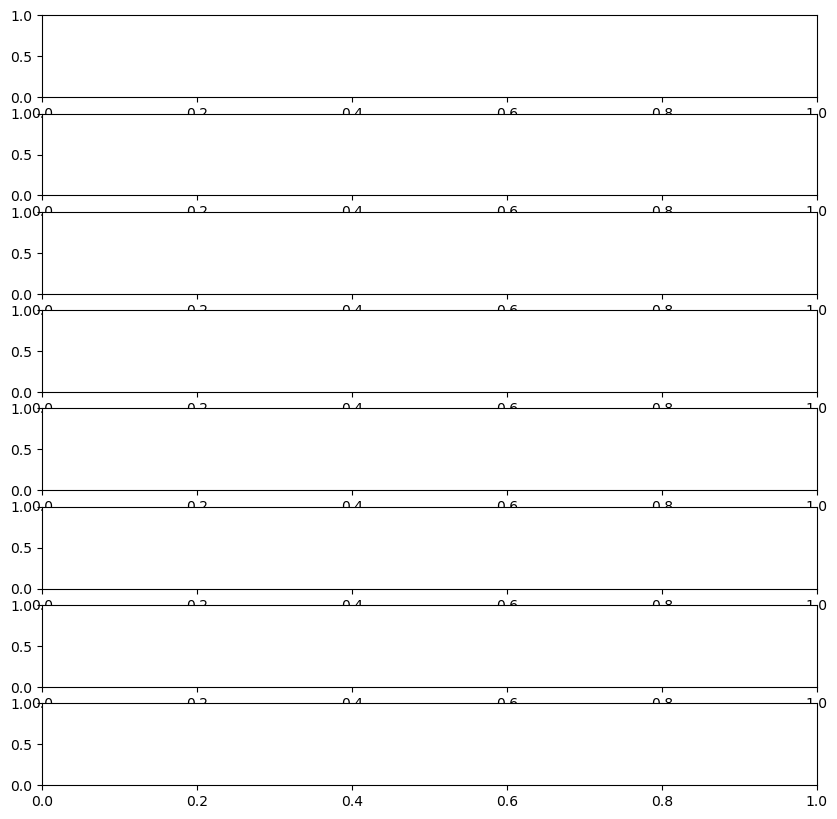

In [77]:
num_heads = attention_weights.shape[0]
fig, axs = plt.subplots(nrows=num_heads, figsize=(10, 10))
print(axs)
for i, ax in enumerate(axs):
    attn_data = attention_weights[i]
    print(attn_data.shape)
    sns.heatmap(attn_data, cmap='YlGnBu', annot=True, ax=ax, xticklabels=range(sequence_length), yticklabels=range(sequence_length))
    ax.set_title(f'Attention Head {i+1}')
plt.tight_layout()
plt.show()

In [78]:
with torch.no_grad():
    for i, batch in enumerate(val_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        logits = outputs.logits

        attn_data = outputs.attentions[-1][0] # extract attention data for last layer
        attn_data = attn_data.squeeze().numpy()

        # plot attention matrix
        with sns.axes_style("white"):
            fig, ax = plt.subplots(figsize=(10, 10))
            sns.heatmap([[attn_data.sum(0)]], cmap='YlGnBu', annot=True, ax=ax, xticklabels=my_tok, yticklabels=my_tok)
            ax.set_title(f'Self Attention {i}')
            ax.set_xlabel("Input Tokens")
            ax.set_ylabel("Input Tokens")
            plt.show()


NameError: name 'val_loader' is not defined

------------------FINALIZED CODE-------------------------------

In [79]:
# from transformers import AutoModelForSequenceClassification
# from datasets import Dataset, load_dataset
# from transformers import AutoTokenizer # T5ForConditionalGeneration # RobertaTokenizer
# id2label = {0: "CORRECT", 1: "BUGGY"}
# label2id = {"CORRECT": 0, "BUGGY": 1}
# from transformers import AutoModelForSequenceClassification
# from datasets import Dataset, load_dataset
# from transformers import AutoTokenizer # T5ForConditionalGeneration # RobertaTokenizer
# model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased',
#                                                            num_labels=2,
#                                                            id2label=id2label,
#                                                            label2id=label2id,output_attentions=True)

# tokenizers = AutoTokenizer.from_pretrained('dipudl/codet5-base')

In [80]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Load pre-trained model tokenizer and model weights
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased', output_attentions=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [81]:
a = "setDimension width height int x y"
b = "swap &first &second char* x y"

In [82]:
# Tokenize input
input_sentence = "setDimension width height int x y"
inputs = tokenizer(input_sentence, return_tensors='pt')



In [83]:
tokens = tokenizer.tokenize(input_sentence)

In [84]:
tokens

['set', '##dim', '##ens', '##ion', 'width', 'height', 'int', 'x', 'y']

In [85]:
inputs

{'input_ids': tensor([[  101,  2275, 22172,  6132,  3258,  9381,  4578, 20014,  1060,  1061,
           102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [86]:
# Generate output by running inputs through model
outputs = model(**inputs)

# Extract hidden states and attention weights
hidden_states = outputs.last_hidden_state
attentions = outputs.attentions[0]

In [109]:
outputs.attentions[5].shape

torch.Size([1, 12, 11, 11])

In [88]:
my_tok = tokenizer.tokenize(input_sentence)
my_tok.insert(0,'Start')
my_tok.append('End')

In [89]:
my_tok

['Start',
 'set',
 '##dim',
 '##ens',
 '##ion',
 'width',
 'height',
 'int',
 'x',
 'y',
 'End']

In [90]:
inputs['input_ids'][0].tolist()

[101, 2275, 22172, 6132, 3258, 9381, 4578, 20014, 1060, 1061, 102]

In [91]:
#outputs.attentions

In [92]:
attentions.shape

torch.Size([1, 12, 11, 11])

In [93]:
i=0
for layer_num, attn_data in enumerate(attentions):
    i = i+1
    print(layer_num + i)

1


In [94]:
attn_data.sum(dim=0).detach().numpy()

array([[6.9496045 , 0.47393334, 0.32996663, 0.451799  , 0.40814474,
        0.451663  , 0.43561104, 0.5051107 , 0.38677   , 0.5670604 ,
        1.0403368 ],
       [3.411458  , 0.87044483, 1.0926881 , 0.79757416, 0.8154995 ,
        1.3739188 , 1.1758953 , 0.6091709 , 0.63203967, 0.3612219 ,
        0.8600887 ],
       [5.8362184 , 0.5102012 , 0.72569305, 1.5457698 , 0.5716638 ,
        0.44569063, 0.42058927, 0.58528984, 0.26561353, 0.44264835,
        0.65062284],
       [4.193921  , 0.50837857, 2.104216  , 0.736452  , 1.4704732 ,
        0.45225126, 0.40512595, 1.020762  , 0.26564336, 0.3311417 ,
        0.5116349 ],
       [3.883049  , 0.42402163, 0.88383126, 2.2118192 , 0.7685701 ,
        1.0075065 , 0.6425834 , 0.66346025, 0.5207025 , 0.44011614,
        0.5543398 ],
       [3.9250493 , 0.5690906 , 0.47473425, 0.7931306 , 1.0433125 ,
        1.4171509 , 1.4039214 , 0.7224779 , 0.62119037, 0.3941621 ,
        0.6357808 ],
       [3.1381698 , 0.63572174, 0.38752016, 0.9379904 , 0.

In [95]:
# for i in range(len(outputs.attentions)):
#     for layer_num, attn_data in enumerate(outputs.attentions[i]):
#         fig, ax = plt.subplots(figsize=(5, 5))
#         cax = ax.matshow(attn_data.sum(dim=0).detach().numpy(), cmap='YlGnBu')
#         #     ax.set_xticklabels([''] + inputs['input_ids'][0].tolist(), rotation=90)
#         #     ax.set_yticklabels([''] + inputs['input_ids'][0].tolist())
#         ax.set_xticklabels(my_tok, rotation=90)
#         ax.set_yticklabels(my_tok)
#         ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#         ax.yaxis.set_major_locator(plt.MultipleLocator(1))
#         ax.set_title(f'Self Attention {i}')
#         fig.colorbar(cax)
#         plt.show()

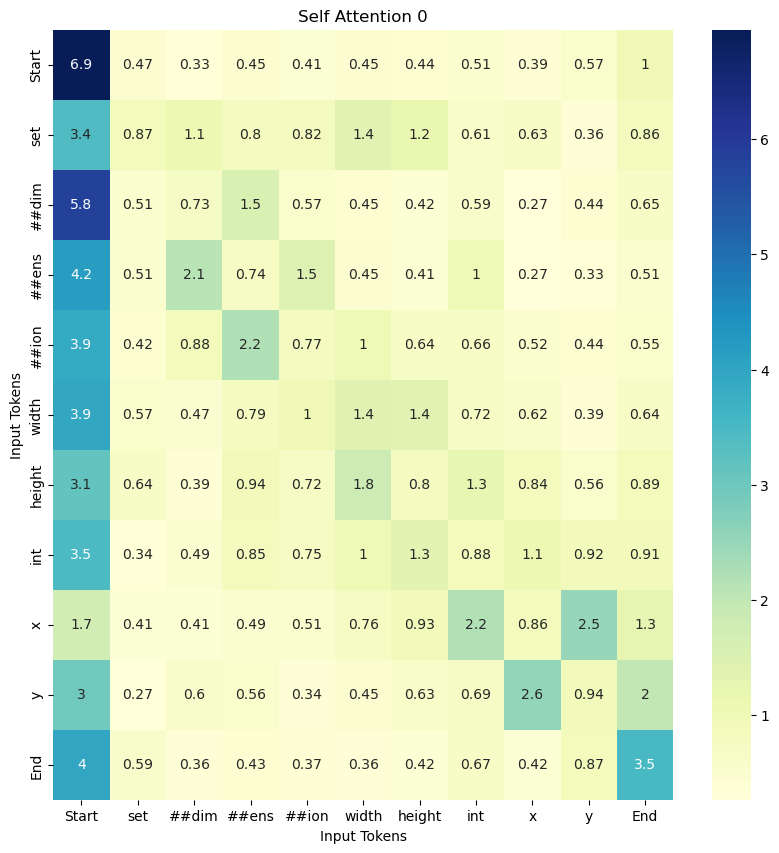

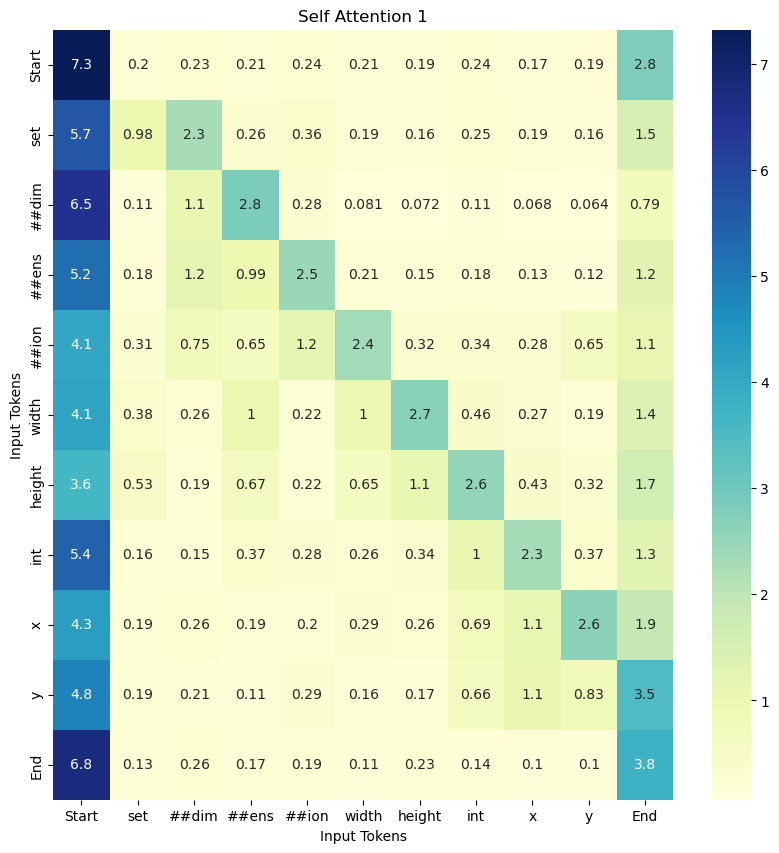

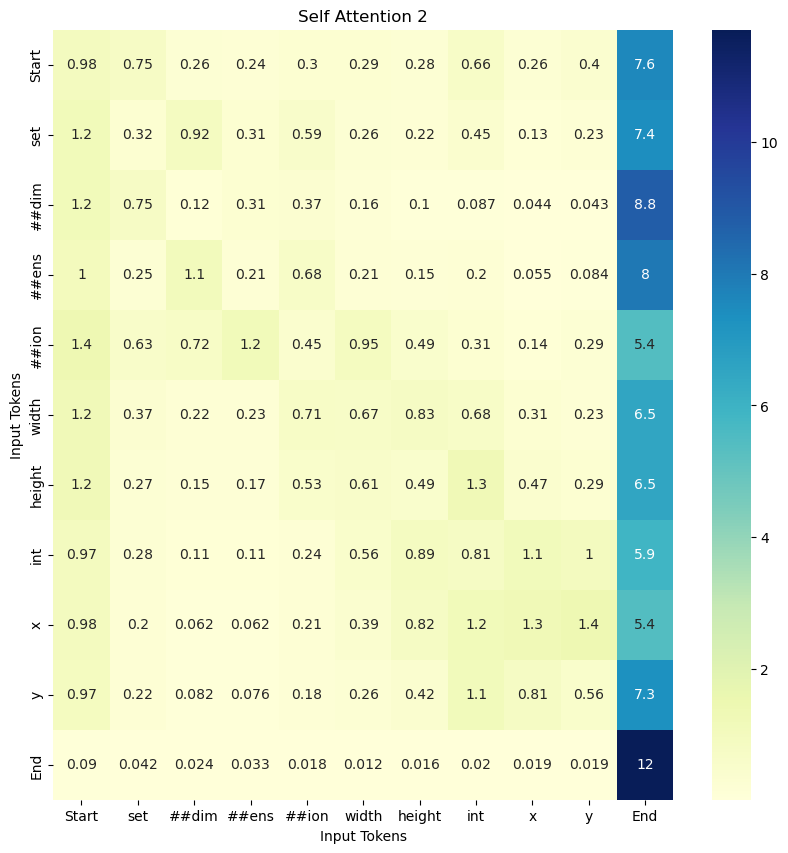

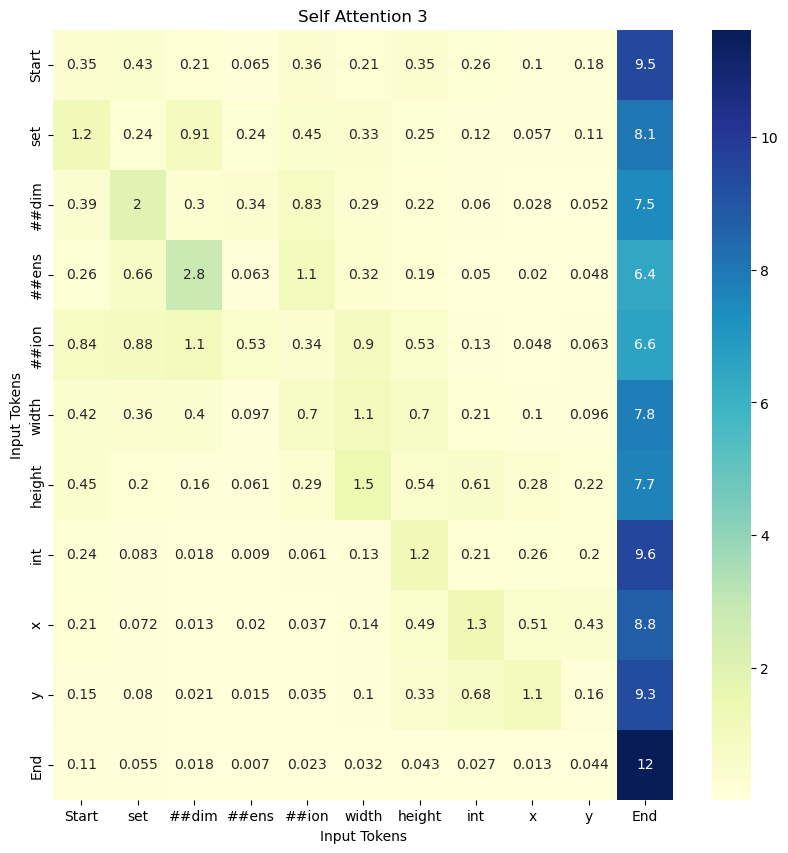

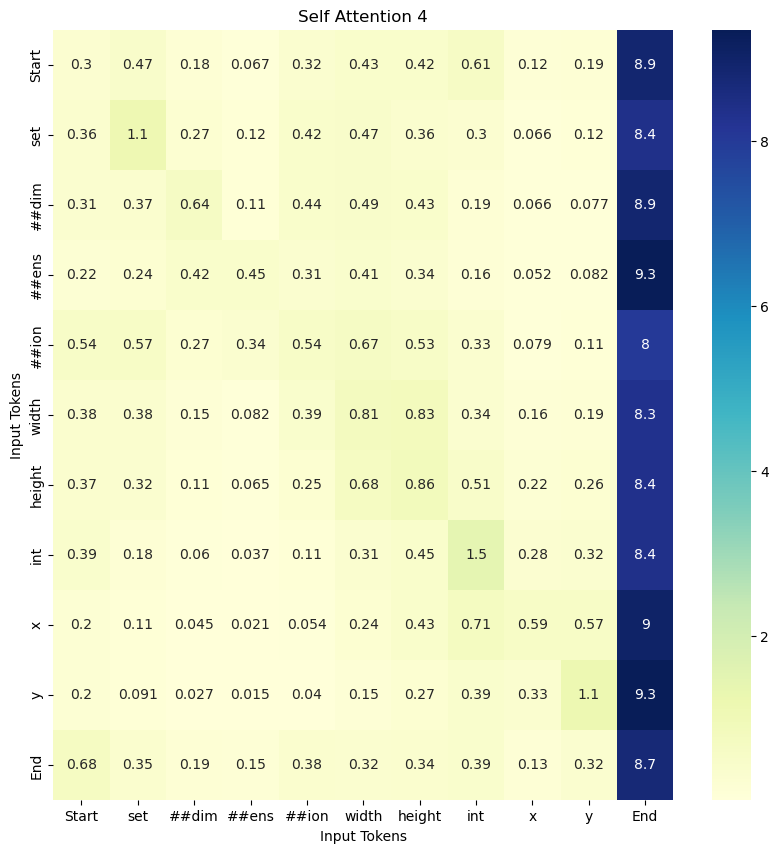

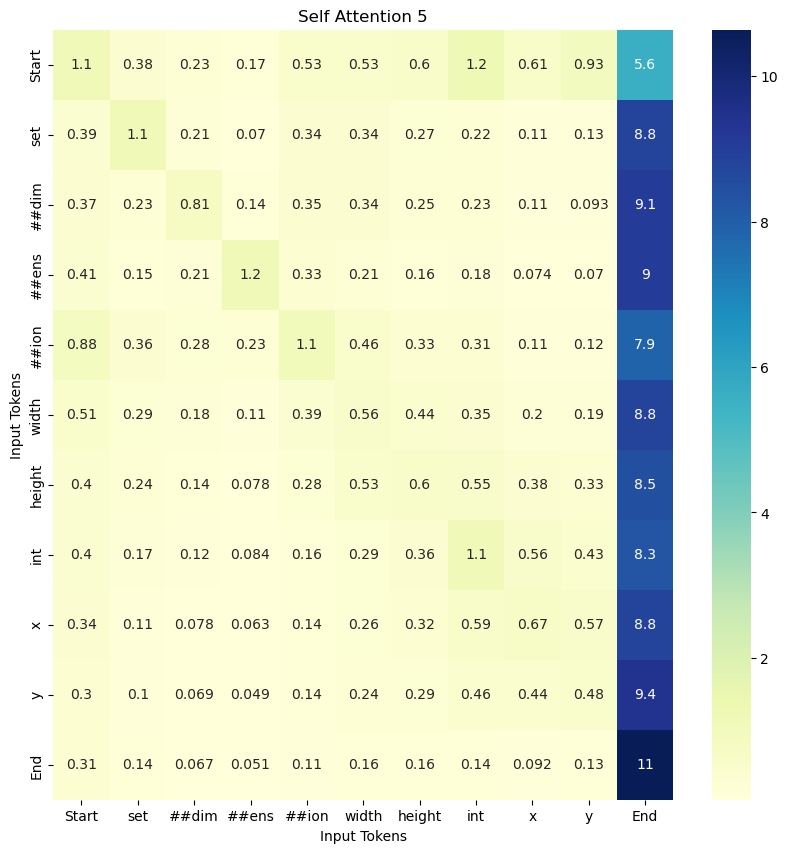

In [96]:
for i in range(len(outputs.attentions)):
    for layer_num, attn_data in enumerate(outputs.attentions[i]):
        fig, ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(attn_data.sum(dim=0).detach().numpy(), cmap='YlGnBu', annot=True, ax=ax,xticklabels=my_tok, yticklabels=my_tok)
        ax.set_title(f'Self Attention {i}')
        ax.set_xlabel("Input Tokens")
        ax.set_ylabel("Input Tokens")
        plt.show()

In [97]:
a = torch.rand(1, 2, 4)

In [98]:
a

tensor([[[0.6799, 0.9750, 0.2601, 0.2915],
         [0.4003, 0.8836, 0.5250, 0.8330]]])

# for positional encoding 

In [99]:
import torch
import torch.nn as nn

max_sequence_length = 10
d_model = 6

In [100]:
def positional_encoding(sequence_length, depth):
  depth = depth/2

  positions = np.arange(sequence_length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1) 

  return tf.cast(pos_encoding, dtype=tf.float32)

(128, 768)


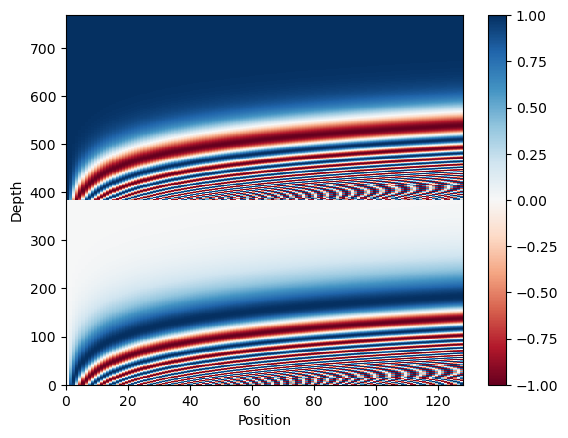

In [101]:
pos_encoding = positional_encoding(sequence_length=128, depth=768)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()